In [2]:
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import torch.nn as nn

#Load file 1
location = pd.read_csv('file1.csv', header=None,
                       names=['Location', 'Code', 'Region', 'Latitude', 'Longitude'])
print(location.head())

    Location  Code  Region  Latitude  Longitude
0  Location1     0       0      5.80       -7.5
1  Location2    11       0      6.33       -3.0
2  Location3    22       0      9.00       -2.0
3  Location4    13       1      5.00        9.5
4  Location5     4       1      3.20       13.7


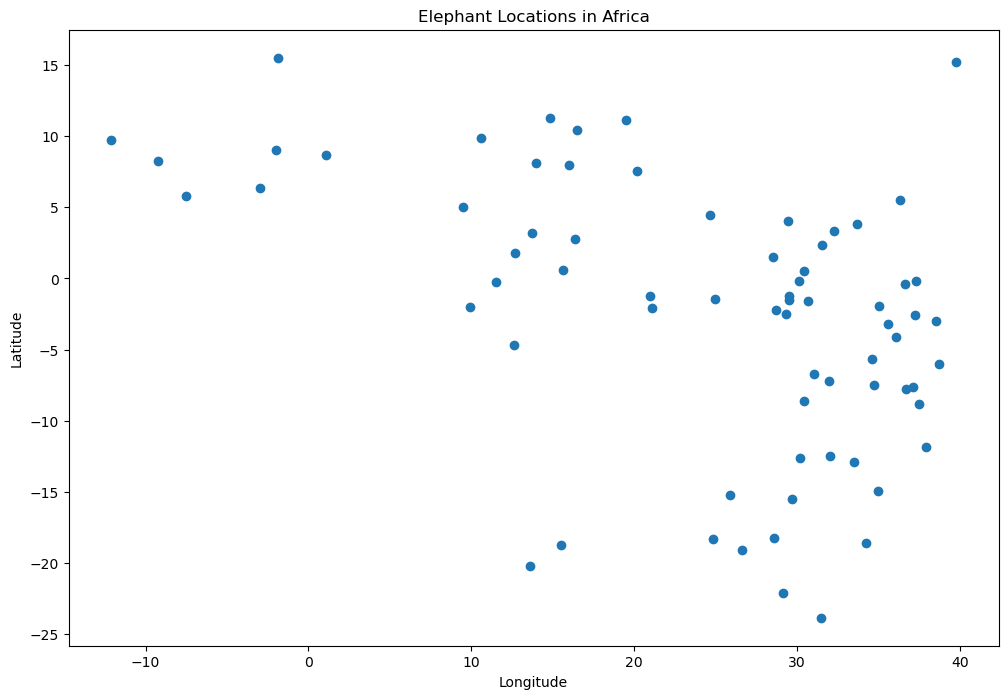

In [3]:
#Visualizing data points
plt.figure(figsize=(12, 8))
plt.scatter(location['Longitude'], location['Latitude'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Elephant Locations in Africa')
plt.show()

In [4]:
#Creating custom dataset class
class ElephantDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.location = dataframe
        self.transform = transform

    def __len__(self):
        return len(self.location)
    
    def __getitem__(self, idx):
        lat = self.location.iloc[idx]['Latitude']
        lon = self.location.iloc[idx]['Longitude']
        region = self.location.iloc[idx]['Region']

        image = torch.randn(3, 224, 224)

        if self.transform:
            image = self.transfor(image)


        return image, torch.tensor([lat, lon]), torch.tensor(region)
    
elephant_dataset = ElephantDataset(location)

dataloader = DataLoader(elephant_dataset, batch_size=32, shuffle=True)
print(len(elephant_dataset))

71


In [5]:
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 112 * 112, 128)
        self.fc2 = nn.Linear(128, 5)  # 5 regions

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = x.view(-1, 64 * 112 * 112)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = SimpleModel()